#  <font size = 32 font color = 'Orange'>Text Moderation Bert Model Building

#  <font size = 40 font color = 'Grey'> TRAINING DATASET GATHERING 

# Getting DataSet from kaggle 


In [ ]:
### Install kaggle with pip command 
! pip install -q kaggle

In [ ]:
###
# Upload kaggle.json file 
###


from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omarhazem","key":"368217b482d6cf4014b780c5a868b960"}'}

In [ ]:
! mkdir ~/.kaggle  # make directory 
! cp kaggle.json ~/.kaggle/ # copy kaggle.json to previous mentioned directory 
! chmod 600 ~/.kaggle/kaggle.json # set read / write permission 

In [ ]:
 ! kaggle datasets list # test kaggle 

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete            World Health Statistics 2020|Complete|Geo-Analysis    1MB  2021-01-10 18:25:49           1877  
gpreda/pfizer-vaccine-tweets                                  Pfizer Vaccine Tweets                               491KB  2021-01-10 12:03:08           1253  
arashnic/covid19-case-surveillance-public-use-dataset         Covid-19 Case Surveillance Public Use Dataset        46MB  2020-12-21 02:24:21            964  
ashkhagan/women-representation-in-city-property-sanfrancisco  Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            300  
google/android-smartphones-high-accuracy-datasets   

In [ ]:
!kaggle datasets download -d yeayates21/jigsaw-multilingual-aug-mix # Download the dataset 

 88% 57.0M/64.7M [00:01<00:00, 50.5MB/s]
100% 64.7M/64.7M [00:01<00:00, 58.0MB/s]


In [ ]:
! unzip  /content/jigsaw-multilingual-aug-mix.zip # unzip the dataset 

Archive:  /content/jigsaw-multilingual-aug-mix.zip
  inflating: jigsaw_mjy_train_val_openaug_523200.csv  
  inflating: train_augmented1605_downsample.csv  


# Exploring the Dataset 

In [ ]:
import pandas as pd # Importing pandas  
My_dataset = pd.read_csv('/content/jigsaw_mjy_train_val_openaug_523200.csv') # reading Dataset

In [ ]:
My_dataset.head(5) # get first 5 enteries

,Unnamed: 0,comment_text,toxic
0,1418409,No surprise at all. Trump cares little about a...,1.0
1,312318,"What an ugly, racist thing to say. I don't kn...",1.0
2,711046,because it is STILL illegal,0.0
3,696866,"Pleah. Voyeurism is pathetic any time, but vo...",1.0
4,1225444,"Мне жаль, но так оно и есть.",0.0


In [ ]:
My_dataset.describe()

,Unnamed: 0,toxic
count,5.312000e+05,531200.000000
mean,7.126769e+05,0.494785
std,5.000058e+05,0.499973
min,0.000000e+00,0.000000
25%,2.597188e+05,0.000000
50%,6.692715e+05,0.000000
75%,1.085969e+06,1.000000
max,1.902185e+06,1.000000


In [ ]:
My_dataset.columns

Index(['Unnamed: 0', 'comment_text', 'toxic'], dtype='object')

In [ ]:
My_dataset.drop('Unnamed: 0' , axis='columns', inplace=True)

In [ ]:
My_dataset.head(5) # get first 5 enteries

,comment_text,toxic
0,No surprise at all. Trump cares little about a...,1.0
1,"What an ugly, racist thing to say. I don't kn...",1.0
2,because it is STILL illegal,0.0
3,"Pleah. Voyeurism is pathetic any time, but vo...",1.0
4,"Мне жаль, но так оно и есть.",0.0


## Dataset Analysis 

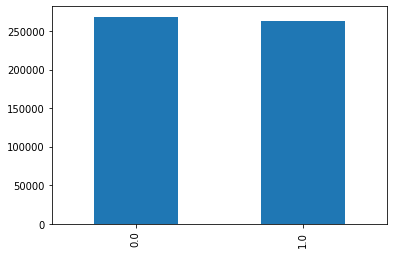

In [ ]:
# draw bar chart 
My_dataset.toxic.value_counts().plot(kind = 'bar') ; 

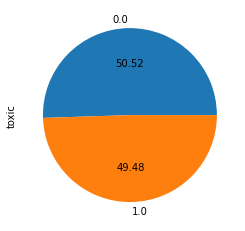

In [ ]:
# Draw pie chart
My_dataset.toxic.value_counts().plot(kind = 'pie',autopct='%.2f') ; 


In [ ]:
#Get shape / size of dataset
My_dataset.shape

(531200, 2)

In [ ]:
My_dataset.head(30)

,comment_text,toxic
0,No surprise at all. Trump cares little about a...,1.0
1,"What an ugly, racist thing to say. I don't kn...",1.0
2,because it is STILL illegal,0.0
3,"Pleah. Voyeurism is pathetic any time, but vo...",1.0
4,"Мне жаль, но так оно и есть.",0.0
5,Sağol baba çok sağol,0.0
6,All of Canada has seen real estate increase bu...,0.0
7,Are you one of Hillary's mad lovers?,1.0
8,Наш президент – жирный вонючий пиндос,1.0
9,I was wrong in stating he takes hormones--ther...,1.0




# Doing Necessary Imports 

In [ ]:

# Import to list directories 
import os

print(os.getcwd())
print(os.listdir(os.getcwd()))

### import for time and time monitoring 
import time
## Imports for Metrics operations 
import numpy as np 
## Imports for dataframes and .csv managment
import pandas as pd 

# TensorFlow library  Imports
import tensorflow as tf
print("tf version: ", tf.__version__)


os.system('pip install swish-activation')


import swish_package
from swish_package import swish



# Keras (backended with Tensorflow) Imports
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import CSVLogger

# Sklearn package for machine learining models 
## WILL BE USED TO SPLIT  TRAIN_VAL DATASETS
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Garbage Collectors
import gc
import sys

## Install Transformers 
os.system('pip install transformers==2.10')



# Import Transformers to get Tokenizer for bert and bert models

import transformers
from transformers import DistilBertTokenizer, TFDistilBertModel 


/content
['.config', 'jigsaw-multilingual-aug-mix.zip', 'jigsaw_mjy_train_val_openaug_523200.csv', 'kaggle.json', 'train_augmented1605_downsample.csv', 'sample_data']
tf version:  2.4.0


#  <font size = 40 font color = 'Grey'> MODELING

#Intialize TPUs
<font color ='Orange'>In this part of code <br>
- TPUs is connected and intialized 
- Tensorflows's Training strategy is set to TPUStrategy to allow tpus to carry on training 

<img src = https://cloud.google.com/images/products/tpu/google-cloud-ai.png>


In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver();
    tf.config.experimental_connect_to_cluster(tpu);
    tf.tpu.experimental.initialize_tpu_system(tpu);
    strategy = tf.distribute.TPUStrategy(tpu);
except ValueError:
    tpu = None
    strategy = tf.distribute.MirroredStrategy()
      

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.47.143.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.47.143.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


#Defining Paramter and Hyperparameters 
<font color ='Orange'>In this part of code <br>
- Parameters is set to be used in upcoming parts
- HyperParameters is set to be used in upcoming parts


In [ ]:
# Configuration
num_of_rep = strategy.num_replicas_in_sync
BATCH_SIZE = 32 * num_of_rep
EPOCHS = 20
MAX_LEN = 192
opt = Adam(lr=1e-5)
loss = 'binary_crossentropy'
metrics=['accuracy']

# BERT Tokenizer
<font color ='Orange'>In this part of code <br>

- To feed our text to BERT : 
 -  It must be split into tokens.<br> 
 - And then these tokens must be mapped to their index in the tokenizer vocabulary.<br>
 - The tokenization must be performed by the tokenizer included with BERT which is bert uncased .
<img src = 'https://jalammar.github.io/images/distilBERT/bert-distilbert-input-tokenization.png'>

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

# Preparing Data for Model 
<font color ='Orange'>In this part of code <br>

- Define our training features(scentences) and labels(toxic or not)
- Create validation set and training set 



In [ ]:
def encode(scentences, tokenizer, max_length):
    encode = tokenizer.batch_encode_plus(scentences,return_attention_masks=False, 
        return_token_type_ids=False, pad_to_max_length=True, max_length=max_length
    )
    encoding_id = np.array(encode['input_ids'])
    return encoding_id

train = pd.read_csv('/content/jigsaw_mjy_train_val_openaug_523200.csv')
x_train = encode(train.comment_text.values, tokenizer,MAX_LEN)
y_train = train.toxic.values

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, 
                                                      test_size=0.20)

train_dataset = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
)

valid_dataset = (
    tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE)
    )


# Creating the Model  
<font color ='Orange'>In this part of code <br>
- Create Input Layer of length 196 which is  Max length 
- Create pretrained bert Transformer layer   
- get cls token from transformer layer and feed to an output layer of one node (Which is our prediction either <br>
 - One if Toxic <br> 
  - zero if not  )

<img src = https://miro.medium.com/max/2048/1*pA9nonGgrKX_v5Zwq3JJiQ.png>


In [ ]:
with strategy.scope():
    transformer_layer = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased')# get pre-trained bert transformer
    input_word_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_word_ids") # Keras Input layer 
    sequence_output = transformer_layer(input_word_ids)[0] # Get the seq output from Transformer layer provided
    cls_token = sequence_output[:, 0, :] # get cls tokkens from each scentence to feed to output
    out = Dense(1, activation='sigmoid')(cls_token) # create output layer with one node <Binary Classification>
    model = Model(inputs=input_word_ids, outputs=out) # Create Model
    model.compile(optimizer=opt, 
                  loss=loss, metrics=metrics) # Compile model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 192)]             0         
_________________________________________________________________
tf_distil_bert_model (TFDist ((None, 192, 768),)       134734080 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 134,734,849
Trainable params: 134,734,849
Non-trainable params: 0
_________________________________________________________________


# Training  the Model  
<font color ='Orange'>In this part of code <br>
- Train the model 




In [ ]:
train_history = model.fit(
    train_dataset,
    steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
    validation_data=valid_dataset,
    epochs=EPOCHS
)

Epoch 1/20
1660/1660 [==============================] - 363s 193ms/step - loss: 0.3693 - accuracy: 0.8191 - val_loss: 0.2049 - val_accuracy: 0.9185
Epoch 2/20
1660/1660 [==============================] - 314s 189ms/step - loss: 0.2010 - accuracy: 0.9195 - val_loss: 0.1874 - val_accuracy: 0.9269
Epoch 3/20
1660/1660 [==============================] - 314s 189ms/step - loss: 0.1721 - accuracy: 0.9325 - val_loss: 0.1907 - val_accuracy: 0.9267
Epoch 4/20
1660/1660 [==============================] - 314s 189ms/step - loss: 0.1507 - accuracy: 0.9415 - val_loss: 0.1831 - val_accuracy: 0.9317
Epoch 5/20
1660/1660 [==============================] - 314s 189ms/step - loss: 0.1322 - accuracy: 0.9494 - val_loss: 0.1937 - val_accuracy: 0.9305
Epoch 6/20
1660/1660 [==============================] - 314s 189ms/step - loss: 0.1160 - accuracy: 0.9559 - val_loss: 0.1999 - val_accuracy: 0.9305
Epoch 7/20
1660/1660 [==============================] - 314s 189ms/step - loss: 0.0993 - accuracy: 0.9622 - val_

#  <font size = 40 font color = 'Grey'> TESTING MODEL
## <font color = 'orange'> In this part of code : 
- Different Datasets is used for testing
- Every Dataset is analyzed and tested 
- Calculate accuracy for each test dataset

## Dataset Found at 
https://www.kaggle.com/c/jigsaw-multilingual-toxic-comment-classification

In [ ]:
!kaggle competitions download -c jigsaw-multilingual-toxic-comment-classification 

jigsaw-unintended-bias-train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
jigsaw-toxic-comment-train-processed-seqlen128.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
jigsaw-toxic-comment-train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
validation-processed-seqlen128.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
validation.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
jigsaw-unintended-bias-train-processed-seqlen128.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test-processed-seqlen128.csv.zip: Skipping, found more rece

In [ ]:
! unzip /content/jigsaw-toxic-comment-train.csv.zip

Archive:  /content/jigsaw-toxic-comment-train.csv.zip
replace jigsaw-toxic-comment-train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# First Testing set : 
 ## - jigsaw-toxic-comment-train.csv 

In [ ]:
test_set = pd.read_csv('jigsaw-toxic-comment-train.csv')

In [ ]:
test_set.head(5)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### <font color = 'Orange'>Problem & Solution : 
- The problem in this dataset is that ic contains multiple labels while we need only one label either toxic or not 
- The Solution :
 - Add All the labels together and create new column for the summation 
 -then if the value in the entry is > 0 it is replaced by 1 else it is kept zero as it is 

In [ ]:
test_set["Combined"] =test_set['toxic']+test_set['severe_toxic']+\
test_set['obscene']+test_set['threat']	+test_set['insult']	+ test_set['identity_hate']

In [ ]:
test_set['Combined']

0         0
1         0
2         0
3         0
4         0
         ..
223544    0
223545    0
223546    0
223547    3
223548    0
Name: Combined, Length: 223549, dtype: int64

In [ ]:
test_set['Combined'] = test_set['Combined'].replace([1,2,3,4,5,6], 1)

In [ ]:
test_set.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Combined
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [ ]:
# Create a Dataset with only comments and label
test_set=test_set[['comment_text' ,'Combined']]

In [ ]:
test_set

,comment_text,Combined
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
223544,":Jerome, I see you never got around to this…! ...",0
223545,==Lucky bastard== \n http://wikimediafoundatio...,0
223546,==shame on you all!!!== \n\n You want to speak...,0
223547,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1


## Dataset Analysis 

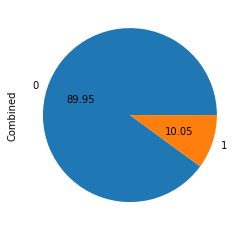

In [ ]:
test_set['Combined'].value_counts().plot(kind = 'pie',autopct='%.2f') ; 

In [ ]:
test_set.shape

(223549, 2)

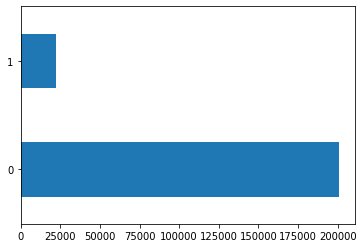

In [ ]:
test_set.Combined.value_counts().plot(kind = 'barh') ;


## Dataset Testing with the Model 

In [ ]:
x_test = encode(test_set.comment_text.values, tokenizer, MAX_LEN)

In [ ]:

test_dataset = (
      tf.data.Dataset
      .from_tensor_slices(x_test)
      .batch(BATCH_SIZE)
  )


In [ ]:
 pr = model.predict(test_dataset , verbose=1 )
 

874/874 [==============================] - 44s 50ms/step


In [ ]:
test_set["predicted"]= pr 

In [ ]:
test_set


,comment_text,Combined,predicted
0,Explanation\nWhy the edits made under my usern...,0,8.940697e-08
1,D'aww! He matches this background colour I'm s...,0,3.775358e-04
2,"Hey man, I'm really not trying to edit war. It...",0,2.384186e-07
3,"""\nMore\nI can't make any real suggestions on ...",0,0.000000e+00
4,"You, sir, are my hero. Any chance you remember...",0,0.000000e+00
...,...,...,...
223544,":Jerome, I see you never got around to this…! ...",0,0.000000e+00
223545,==Lucky bastard== \n http://wikimediafoundatio...,0,9.525582e-01
223546,==shame on you all!!!== \n\n You want to speak...,0,9.996398e-01
223547,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,9.999999e-01


In [ ]:
test_set["predicted"] = test_set["predicted"].round()

In [ ]:
test_set

,comment_text,Combined,predicted
0,Explanation\nWhy the edits made under my usern...,0,0.0
1,D'aww! He matches this background colour I'm s...,0,0.0
2,"Hey man, I'm really not trying to edit war. It...",0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",0,0.0
4,"You, sir, are my hero. Any chance you remember...",0,0.0
...,...,...,...
223544,":Jerome, I see you never got around to this…! ...",0,0.0
223545,==Lucky bastard== \n http://wikimediafoundatio...,0,1.0
223546,==shame on you all!!!== \n\n You want to speak...,0,1.0
223547,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,1.0


## Testing Evaluation 

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_testset_kaggle = test_set["predicted"].tolist()
y_true_testset_kaggle = test_set["Combined"].tolist()
accuracy_score(y_true_testset_kaggle, y_pred_testset_kaggle)

0.9328156243150272

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
test_combined_auc = roc_auc_score(y_true_testset_kaggle, y_pred_testset_kaggle)
test_combined_auc

0.948955605983131

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision ,recall, fscore , _  =precision_recall_fscore_support(y_true_testset_kaggle, y_pred_testset_kaggle, average='weighted')
print('precision:' , precision , '    recall : '  ,recall, '    fscore : ' ,fscore)

precision: 0.9567906678784871     recall :  0.9328156243150272     fscore :  0.9394561088634049


# Second Testing set : 
 ## - validation.csv 

In [ ]:
! unzip '/content/validation.csv.zip'

Archive:  /content/validation.csv.zip
  inflating: validation.csv          


In [ ]:
test_set = pd.read_csv('validation.csv')
test_set.head(5)


,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0


In [ ]:
test_set.drop("id" , axis =1 , inplace= True)
test_set.head(5)

,comment_text,lang,toxic
0,Este usuario ni siquiera llega al rango de ...,es,0
1,Il testo di questa voce pare esser scopiazzato...,it,0
2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0


## Dataset Analysis 

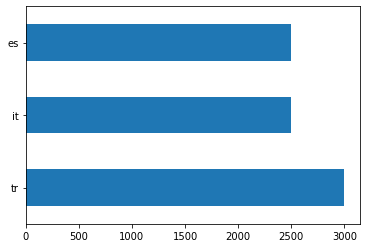

In [ ]:
test_set.lang.value_counts().plot(kind = 'barh') ;


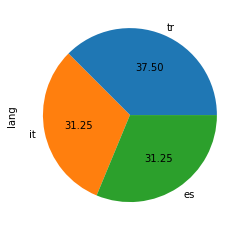

In [ ]:
test_set.lang.value_counts().plot(kind = 'pie' , autopct='%.2f') ;

### Spliting the test dataset : 
- In order to determine each language accuracy 
 - Divide the testing dataset where each splited dataset is one language testing dataset 
 - For example italian only dataet , Spanish only dataset.....etc

In [ ]:
compined_test_languages_df = {}
for language, data in test_set.groupby('lang'):
    compined_test_languages_df[f'test_set_{language}'] = data

In [ ]:
compined_test_languages_df

{'test_set_es':                                            comment_text lang  toxic
 0     Este usuario ni siquiera llega al rango de    ...   es      0
 2     Vale. Sólo expongo mi pasado. Todo tiempo pasa...   es      1
 6     No es mala idea. De hecho, yo estaba pensando ...   es      0
 9     Creo que es importante que podamos reconocer a...   es      0
 12    No sabemos quien es el autor del pie de imagen...   es      0
 ...                                                 ...  ...    ...
 7989  +1 para el tipo que dice que es vandalismo, ma...   es      1
 7991  No has demostrado nada. Mientes de forma desca...   es      0
 7994  Hola Santiago! Te he contestado en tu página d...   es      0
 7996  El imbesil ete dela luna no se entera ni ostia...   es      1
 7998  El mapa del reinado de Alhaken esta ligerament...   es      0
 
 [2500 rows x 3 columns],
 'test_set_it':                                            comment_text lang  toxic
 1     Il testo di questa voce pare esser sco

In [ ]:
compined_test_languages_df.keys()

dict_keys(['test_set_es', 'test_set_it', 'test_set_tr'])

In [ ]:
for key in compined_test_languages_df.keys() : 
  compined_test_languages_df[key].drop('lang' , axis =1 , inplace = True)

## Italian test Dataset 

In [ ]:
compined_test_languages_df['test_set_it']

,comment_text,toxic
1,Il testo di questa voce pare esser scopiazzato...,0
10,"Ciao, in sintesi Ti dico questo, trovo sbaglia...",0
16,il buon senso non lo usate voi. siete voi i ve...,1
17,In riguardo a cio che ho pubblicato e tu hai ...,1
19,Ma che cosa stai dicendo!??? Questa è la versi...,1
...,...,...
7985,sbaglio a sei gia stato caldamente invitato d...,0
7986,Scusa se ho pensato ke fossi una femmina.... d...,1
7990,"Sei il primo che mi dice una cosa simile, e qu...",0
7995,Il fatto è che la pagina dei personaggi minor...,0


In [ ]:

x_test = encode(compined_test_languages_df['test_set_it'].comment_text.values, tokenizer, MAX_LEN)

In [ ]:

test_dataset = (
      tf.data.Dataset
      .from_tensor_slices(x_test)
      .batch(BATCH_SIZE)
  )


In [ ]:
compined_test_languages_df['test_set_it']["Predicted"] = model.predict(test_dataset , verbose=1 )

10/10 [==============================] - 2s 55ms/step


In [ ]:
compined_test_languages_df['test_set_it']["Predicted"] = compined_test_languages_df['test_set_it']["Predicted"].round()

In [ ]:
compined_test_languages_df['test_set_it']

,comment_text,toxic,Predicted
1,Il testo di questa voce pare esser scopiazzato...,0,0.0
10,"Ciao, in sintesi Ti dico questo, trovo sbaglia...",0,0.0
16,il buon senso non lo usate voi. siete voi i ve...,1,1.0
17,In riguardo a cio che ho pubblicato e tu hai ...,1,1.0
19,Ma che cosa stai dicendo!??? Questa è la versi...,1,1.0
...,...,...,...
7985,sbaglio a sei gia stato caldamente invitato d...,0,1.0
7986,Scusa se ho pensato ke fossi una femmina.... d...,1,1.0
7990,"Sei il primo che mi dice una cosa simile, e qu...",0,0.0
7995,Il fatto è che la pagina dei personaggi minor...,0,0.0


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_italian = compined_test_languages_df['test_set_it']['Predicted'].tolist()
y_true_italian = compined_test_languages_df['test_set_it']['toxic'].tolist()
accuracy_score(y_true_italian, y_pred_italian)

0.9788

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
italian_combined_auc = roc_auc_score(y_true_italian, y_pred_italian)
italian_combined_auc



0.9705313202750708

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision ,recall, fscore , _  =precision_recall_fscore_support(y_true_italian, y_pred_italian, average='weighted')
print('precision:' , precision , '    recall : '  ,recall, '    fscore : ' ,fscore)

precision: 0.9790359874171131     recall :  0.9788     fscore :  0.9788890801955448


## Spanish test Dataset 

In [ ]:
compined_test_languages_df['test_set_es']

,comment_text,toxic
0,Este usuario ni siquiera llega al rango de ...,0
2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,1
6,"No es mala idea. De hecho, yo estaba pensando ...",0
9,Creo que es importante que podamos reconocer a...,0
12,No sabemos quien es el autor del pie de imagen...,0
...,...,...
7989,"+1 para el tipo que dice que es vandalismo, ma...",1
7991,No has demostrado nada. Mientes de forma desca...,0
7994,Hola Santiago! Te he contestado en tu página d...,0
7996,El imbesil ete dela luna no se entera ni ostia...,1


In [ ]:

x_test = encode(compined_test_languages_df['test_set_es'].comment_text.values, tokenizer, MAX_LEN)

In [ ]:

test_dataset = (
      tf.data.Dataset
      .from_tensor_slices(x_test)
      .batch(BATCH_SIZE)
  )


In [ ]:
compined_test_languages_df['test_set_es']["Predicted"] = model.predict(test_dataset , verbose=1 )

10/10 [==============================] - 1s 55ms/step


In [ ]:
compined_test_languages_df['test_set_es']["Predicted"] = compined_test_languages_df['test_set_es']["Predicted"].round()

In [ ]:
compined_test_languages_df['test_set_es']

,comment_text,toxic,Predicted
0,Este usuario ni siquiera llega al rango de ...,0,0.0
2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,1,1.0
6,"No es mala idea. De hecho, yo estaba pensando ...",0,0.0
9,Creo que es importante que podamos reconocer a...,0,0.0
12,No sabemos quien es el autor del pie de imagen...,0,0.0
...,...,...,...
7989,"+1 para el tipo que dice que es vandalismo, ma...",1,1.0
7991,No has demostrado nada. Mientes de forma desca...,0,0.0
7994,Hola Santiago! Te he contestado en tu página d...,0,0.0
7996,El imbesil ete dela luna no se entera ni ostia...,1,1.0


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_es = compined_test_languages_df['test_set_es']['Predicted'].tolist()
y_true_es = compined_test_languages_df['test_set_es']['toxic'].tolist()
accuracy_score(y_true_es, y_pred_es)

0.9784

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
spanish_combined_auc = roc_auc_score(y_true_es, y_pred_es)
spanish_combined_auc


0.9700108106135592

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision ,recall, fscore , _  =precision_recall_fscore_support(y_true_es, y_pred_es, average='weighted')
print('precision:' , precision , '    recall : '  ,recall, '    fscore : ' ,fscore)

precision: 0.9789261782877318     recall :  0.9784     fscore :  0.9785785428247503


## Turkish test Dataset 

In [ ]:
compined_test_languages_df['test_set_tr']

,comment_text,toxic
3,Bu maddenin alt başlığı olarak uluslararası i...,0
4,Belçika nın şehirlerinin yanında ilçe ve belde...,0
5,"güzel, zaten kaynaklandırması zor subjektif ka...",0
7,"Kod hatalarını düzeltmişsiniz,elinize sağlık ç...",0
8,Levent Abi nasılsın? Hayat nasıl gidiyor? Umar...,0
...,...,...
7987,"Merhaba, Dediğiniz durum sıkça yaşanıyor. Ben ...",0
7988,Aynen. kübada hiç bir dönem sosyalist inşa ger...,0
7992,Hcagri isimli kullanıcı öğrenme süreci hakkınd...,0
7993,Öyle sanıyorum ki bahsettiğiniz Şəmsi Bədəlbəy...,0


In [ ]:

x_test = encode(compined_test_languages_df['test_set_tr'].comment_text.values, tokenizer, MAX_LEN)

In [ ]:

test_dataset = (
      tf.data.Dataset
      .from_tensor_slices(x_test)
      .batch(BATCH_SIZE)
  )


In [ ]:
compined_test_languages_df['test_set_tr']["Predicted"] = model.predict(test_dataset , verbose=1 )

12/12 [==============================] - 5s 377ms/step


In [ ]:
compined_test_languages_df['test_set_tr']["Predicted"] = compined_test_languages_df['test_set_tr']["Predicted"].round()

In [ ]:
compined_test_languages_df['test_set_tr']

,comment_text,toxic,Predicted
3,Bu maddenin alt başlığı olarak uluslararası i...,0,0.0
4,Belçika nın şehirlerinin yanında ilçe ve belde...,0,0.0
5,"güzel, zaten kaynaklandırması zor subjektif ka...",0,0.0
7,"Kod hatalarını düzeltmişsiniz,elinize sağlık ç...",0,0.0
8,Levent Abi nasılsın? Hayat nasıl gidiyor? Umar...,0,0.0
...,...,...,...
7987,"Merhaba, Dediğiniz durum sıkça yaşanıyor. Ben ...",0,0.0
7988,Aynen. kübada hiç bir dönem sosyalist inşa ger...,0,0.0
7992,Hcagri isimli kullanıcı öğrenme süreci hakkınd...,0,0.0
7993,Öyle sanıyorum ki bahsettiğiniz Şəmsi Bədəlbəy...,0,0.0


In [ ]:
from sklearn.metrics import accuracy_score
y_pred_tr = compined_test_languages_df['test_set_tr']['Predicted'].tolist()
y_true_tr = compined_test_languages_df['test_set_tr']['toxic'].tolist()
accuracy_score(y_true_tr, y_pred_tr)

0.995

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
tr_combined_auc = roc_auc_score(y_true_tr, y_pred_tr)
tr_combined_auc


0.9903218283582089

In [ ]:

from sklearn.metrics import precision_recall_fscore_support
precision ,recall, fscore , _  =precision_recall_fscore_support(y_true_tr, y_pred_tr, average='weighted')
print('precision:' , precision , '    recall : '  ,recall, '    fscore : ' ,fscore)

precision: 0.9950481667864846     recall :  0.995     fscore :  0.995017045577921


## Frensh Tweets Dataset

In [ ]:
test_set = pd.read_csv('/content/french_tweets-003.csv')
test_set.head(5)


,label,text
0,0,Les prières vont à la famille de nick kolokith...
1,0,Je ne l'ai pas vue
2,0,Je voudrais penser que je suis une fille à têt...
3,0,Eh juste invité à un voyage gratuit à montreal...
4,0,Sur le chemin de l'accueil de Audrey. Elle ne ...


##Data Analysis


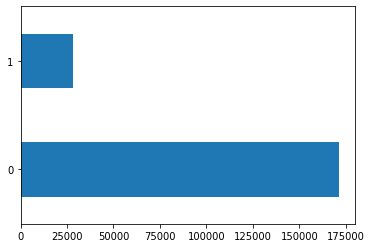

In [ ]:
test_set['label'].value_counts().plot(kind = 'barh')

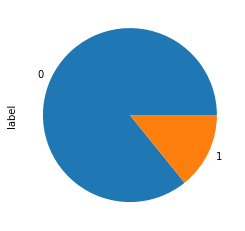

In [ ]:
test_set['label'].value_counts().plot(kind = 'pie')


## Testing Dataset


In [ ]:

x_test = encode(test_set.text.values, tokenizer, MAX_LEN)



In [ ]:
test_dataset = (
      tf.data.Dataset
      .from_tensor_slices(x_test)
      .batch(BATCH_SIZE)
  )

In [ ]:
 pr = model.predict(test_dataset , verbose=1 )
 

782/782 [==============================] - 43s 53ms/step


In [ ]:
test_set["Prediction"] =pr

In [ ]:
test_set["Prediction"] = test_set["Prediction"].round()

In [ ]:
test_set

,label,text,Prediction
0,0,Les prières vont à la famille de nick kolokith...,0.0
1,0,Je ne l'ai pas vue,0.0
2,0,Je voudrais penser que je suis une fille à têt...,0.0
3,0,Eh juste invité à un voyage gratuit à montreal...,0.0
4,0,Sur le chemin de l'accueil de Audrey. Elle ne ...,0.0
...,...,...,...
199982,1,Est toujours une compagnie de musique pr ... m...,0.0
199983,1,Mcfly arrive au diner !! (: S'il vous plaît!!,0.0
199984,1,"thanks man, prend un mojito a ma sant",0.0
199985,1,Vous devez,0.0


## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_fr = test_set["Prediction"].tolist()
y_true_fr = test_set["label"].tolist()
accuracy_score(y_true_fr, y_pred_fr)

0.7245820978363594

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
frensh_combined_auc = roc_auc_score(y_true_fr, y_pred_fr)
frensh_combined_auc

0.4743016862052975

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision ,recall, fscore , _  =precision_recall_fscore_support(y_true_fr, y_pred_fr, average='weighted')
print('precision:' , precision , '    recall : '  ,recall, '    fscore : ' ,fscore)

precision: 0.7448163363960814     recall :  0.7245820978363594     fscore :  0.7343897374181105


# NEW GERMAN DATASET

In [ ]:
german_test = pd.read_csv('/content/german_dataset.tsv',sep='\t')

In [ ]:
german_test = german_test[['text' ,'task_1']]

In [ ]:
german_test = german_test.replace({'task_1' : {'NOT' : 0 , 'HOF' : 1 } })

In [ ]:
german_test

# Data Analysis 

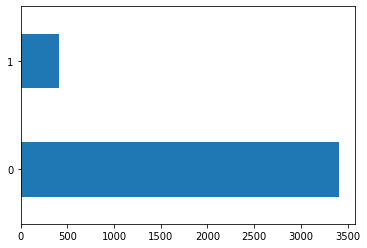

In [ ]:
german_test.task_1.value_counts().plot(kind = "barh")

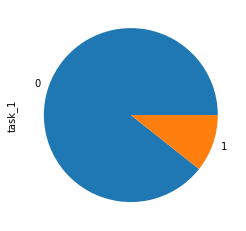

In [ ]:
german_test.task_1.value_counts().plot(kind = "pie")

# Testing the Dataset

In [ ]:

x_test = encode(german_test.text.values, tokenizer, MAX_LEN)



In [ ]:
test_dataset = (
      tf.data.Dataset
      .from_tensor_slices(x_test)
      .batch(BATCH_SIZE)
  )

In [ ]:
 pr = model.predict(test_dataset , verbose=1 )
 

15/15 [==============================] - 1s 54ms/step


In [ ]:
german_test["Prediction"] =pr

In [ ]:
german_test["Prediction"] = german_test["Prediction"].round()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gr_new = german_test["Prediction"].tolist()
y_true_gr_new = german_test["task_1"].tolist()
accuracy_score(y_true_gr_new, y_pred_gr_new)

0.8695993715632364

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision ,recall, fscore , _  =precision_recall_fscore_support(y_true_gr_new, y_pred_gr_new, average='weighted')
print('precision:' , precision , '    recall : '  ,recall, '    fscore : ' ,fscore)

precision: 0.8462265676617037     recall :  0.8695993715632364     fscore :  0.8560495557155091


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
german_new_combined_auc = roc_auc_score(y_true_gr_new, y_pred_gr_new)
german_new_combined_auc

0.5753854008543341

### Testing Single Value

In [ ]:
test_scentence = np.array(["black man "])

In [ ]:

x_test = encode(test_scentence, tokenizer, MAX_LEN)

In [ ]:

test_dataset = (
      tf.data.Dataset
      .from_tensor_slices(x_test)
      .batch(BATCH_SIZE)
  )


In [ ]:
model.predict(test_dataset , verbose=1 )

1/1 [==============================] - 2s 2s/step


array([[0.9982103]], dtype=float32)

# ROC /AUC Curve

In [ ]:
test_kaggle_fpr, test_kaggle_tpr, _ = roc_curve(y_true_testset_kaggle, y_pred_testset_kaggle)
german_fpr, german_tpr, _ = roc_curve(y_true_gr, y_pred_gr)
frensh_fpr, frensh_tpr, _ = roc_curve(y_true_fr, y_pred_fr)
turkey_fpr, turkey_tpr, _ = roc_curve(y_true_tr, y_pred_tr)
spanish_fpr, spanish_tpr, _ = roc_curve(y_true_es, y_pred_es)
italian_fpr,italian_tpr, _ = roc_curve(y_true_italian, y_pred_italian)
other_german_fpr,other_german_tpr, _ = roc_curve(y_true_gr_new, y_pred_gr_new)







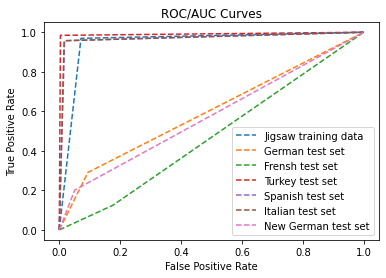

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(test_kaggle_fpr, test_kaggle_tpr, linestyle='--', label='Jigsaw training data')
plt.plot(german_fpr, german_tpr, linestyle='--',label='German test set')
plt.plot(frensh_fpr, frensh_tpr, linestyle='--', label='Frensh test set')
plt.plot(turkey_fpr, turkey_tpr, linestyle='--', label='Turkey test set')
plt.plot(spanish_fpr, spanish_tpr, linestyle='--', label='Spanish test set')
plt.plot(italian_fpr,italian_tpr, linestyle='--', label='Italian test set')
plt.plot(other_german_fpr,other_german_tpr, linestyle='--', label='New German test set')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title("ROC/AUC Curves")

plt.show()